# Titanic Data Cleaning & Exploratory Data Analysis

# 1. Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Loading the Data

In [4]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Check Missing Values

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 4. Handle Missing Values

In [11]:
# Fill 'Age' if it exists and has missing values
if 'Age' in df.columns and df['Age'].isnull().any():
    df['Age'] = df['Age'].fillna(df['Age'].median())

In [13]:
# Fill 'Embarked' if it exists and has missing values
if 'Embarked' in df.columns and df['Embarked'].isnull().any():
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [15]:
# Drop 'Cabin' if it exists
if 'Cabin' in df.columns:
    df = df.drop(columns=['Cabin'])

In [17]:
# Checking Handled missing values
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## 5. Encode Categorical Variables

In [20]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


## 6. Visualizations

In [31]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

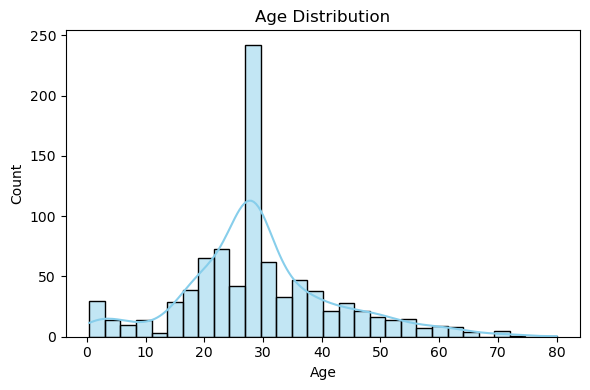

In [33]:
# Age Distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title("Age Distribution")
plt.tight_layout()
plt.show()

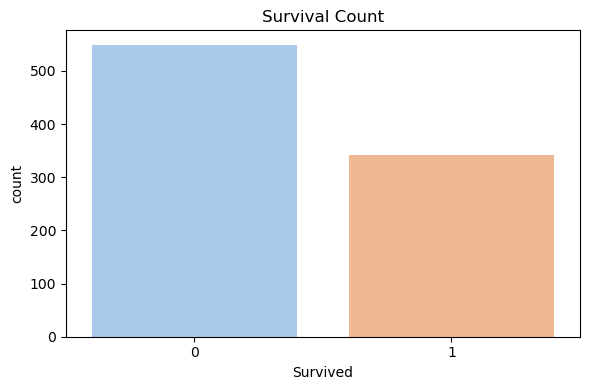

In [35]:
# Survival Count
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df, palette='pastel')
plt.title("Survival Count")
plt.tight_layout()
plt.show()

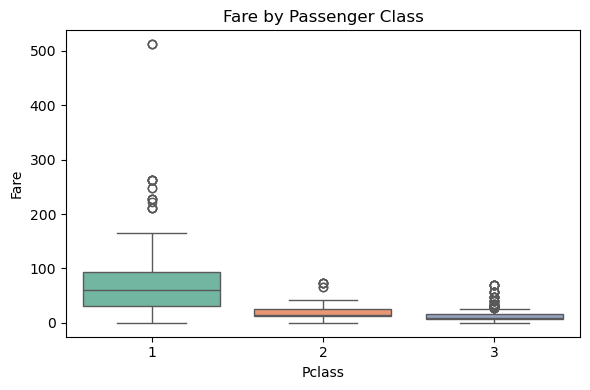

In [37]:
# Fare by Pclass
plt.figure(figsize=(6, 4))
sns.boxplot(x='Pclass', y='Fare', data=df, palette='Set2')
plt.title("Fare by Passenger Class")
plt.tight_layout()
plt.show()